# 背景


**背景：
您的客户是一家跨国金融公司，向消费者提供多种产品。尽管主要的贡献来自线下分销渠道，但是有多种渠道可以为消费者提供这些产品。离线渠道通过其代理商网络向消费者出售金融产品，并且根据政府法规，这些代理商必须获得销售金融产品的认证。针对不同类别的金融产品，有多种认证计划。 

由于这个离线渠道对公司的总销售额贡献很大，因此公司专注于招聘和认证他们以建立大型代理商网络。在这里，主要的挑战是培训他们获得销售各种类型产品的认证。

在多个程序中，将为您提供针对培训课程测试明智的学员绩效的数据集。您的任务是根据人口统计信息和培训计划/测试详细信息来预测此类测试的性能。这将使您的客户找出最重要的因素，从而导致受训者更好地参与并提高表现，从而加强其培训问题。

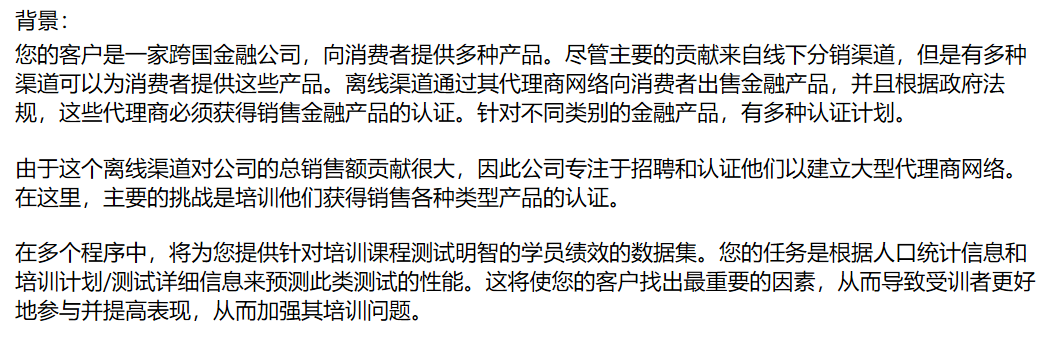**

# 数据预处理

## 数据准备

导入相关的库

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv("./train_HK6lq50.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [4]:
df_test=pd.read_csv("./test_wF0Ps6O.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


测试、训练集先统一一张表，方便数据清洗

In [5]:
df=pd.concat([df,df_test],ignore_index=True,sort=False)

In [6]:
df

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1.0
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1.0
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1.0
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1.0
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0.0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1.0
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1.0
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1.0
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0


## 数据初步探索

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 16 columns):
id                           104496 non-null object
program_id                   104496 non-null object
program_type                 104496 non-null object
program_duration             104496 non-null int64
test_id                      104496 non-null int64
test_type                    104496 non-null object
difficulty_level             104496 non-null object
trainee_id                   104496 non-null int64
gender                       104496 non-null object
education                    104496 non-null object
city_tier                    104496 non-null int64
age                          64976 non-null float64
total_programs_enrolled      104496 non-null int64
is_handicapped               104496 non-null object
trainee_engagement_rating    104388 non-null float64
is_pass                      73147 non-null float64
dtypes: float64(3), int64(5), object(8)
memory usage: 12.8+ M

In [8]:
df.sample(5)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
60562,16591_179,Z_1,Z,136,179,offline,easy,16591,F,Matriculation,1,44.0,1,N,1.0,0.0
37728,2758_149,Y_1,Y,136,149,offline,intermediate,2758,M,High School Diploma,3,NaN,4,N,2.0,1.0
38830,3391_59,U_1,U,134,59,offline,intermediate,3391,F,High School Diploma,1,28.0,3,N,1.0,0.0
37410,6297_18,T_4,T,120,18,online,easy,6297,F,High School Diploma,3,34.0,6,N,4.0,1.0
42488,3506_126,Y_3,Y,135,126,offline,intermediate,3506,F,Matriculation,2,25.0,4,N,2.0,1.0


In [9]:
df.head(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1.0
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1.0
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1.0
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1.0
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0.0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1.0
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1.0
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1.0
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0


In [10]:
df[df.test_id==84]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1.0
124,8516_84,V_3,V,131,84,offline,intermediate,8516,M,High School Diploma,2,42.0,4,N,2.0,0.0
329,18396_84,V_3,V,131,84,offline,intermediate,18396,F,High School Diploma,1,56.0,3,N,3.0,0.0
354,3468_84,V_3,V,131,84,offline,intermediate,3468,M,Matriculation,1,NaN,2,N,2.0,1.0
371,5157_84,V_3,V,131,84,offline,intermediate,5157,F,High School Diploma,2,44.0,2,N,5.0,1.0
407,10994_84,V_3,V,131,84,offline,intermediate,10994,F,Matriculation,3,NaN,3,N,4.0,1.0
874,8544_84,V_3,V,131,84,offline,intermediate,8544,F,Bachelors,2,43.0,2,N,4.0,1.0
1239,6471_84,V_3,V,131,84,offline,intermediate,6471,F,Matriculation,1,46.0,2,Y,2.0,0.0
1836,1157_84,V_3,V,131,84,offline,intermediate,1157,M,Bachelors,3,31.0,2,N,5.0,0.0
1940,3411_84,V_3,V,131,84,offline,intermediate,3411,F,High School Diploma,2,NaN,2,Y,2.0,0.0


In [11]:
df[df.program_id=="Y_1"]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
12,15848_149,Y_1,Y,136,149,offline,intermediate,15848,M,High School Diploma,1,NaN,4,N,4.0,1.0
19,13920_151,Y_1,Y,136,151,offline,hard,13920,F,Bachelors,3,28.0,2,N,4.0,0.0
20,10498_159,Y_1,Y,136,159,online,easy,10498,M,High School Diploma,3,27.0,2,N,4.0,1.0
23,299_150,Y_1,Y,136,150,offline,intermediate,299,M,High School Diploma,2,NaN,2,N,3.0,1.0
35,16303_157,Y_1,Y,136,157,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
36,16421_154,Y_1,Y,136,154,online,easy,16421,M,High School Diploma,1,NaN,2,N,2.0,1.0
76,14133_152,Y_1,Y,136,152,offline,hard,14133,M,Bachelors,2,29.0,2,N,4.0,1.0
85,14799_155,Y_1,Y,136,155,online,easy,14799,M,Bachelors,3,46.0,2,N,5.0,1.0


In [12]:
df[df.program_type=="Y"]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1.0
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
12,15848_149,Y_1,Y,136,149,offline,intermediate,15848,M,High School Diploma,1,NaN,4,N,4.0,1.0
13,423_126,Y_3,Y,135,126,offline,intermediate,423,M,Matriculation,3,NaN,4,N,5.0,1.0
19,13920_151,Y_1,Y,136,151,offline,hard,13920,F,Bachelors,3,28.0,2,N,4.0,0.0
20,10498_159,Y_1,Y,136,159,online,easy,10498,M,High School Diploma,3,27.0,2,N,4.0,1.0
22,2352_115,Y_4,Y,121,115,offline,hard,2352,M,High School Diploma,3,NaN,6,Y,3.0,1.0
23,299_150,Y_1,Y,136,150,offline,intermediate,299,M,High School Diploma,2,NaN,2,N,3.0,1.0
24,12764_144,Y_2,Y,120,144,online,easy,12764,M,Matriculation,2,NaN,3,N,2.0,1.0


In [13]:
df[df.trainee_id==17019]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
5313,17019_159,Y_1,Y,136,159,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
7988,17019_156,Y_1,Y,136,156,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
19159,17019_157,Y_1,Y,136,157,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
49691,17019_149,Y_1,Y,136,149,offline,intermediate,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
67209,17019_154,Y_1,Y,136,154,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
72445,17019_151,Y_1,Y,136,151,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
78004,17019_160,Y_1,Y,136,160,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,NaN


In [14]:
df[df.trainee_id==16303]#online 一般online是easy? 年龄是否有重要影响？

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
35,16303_157,Y_1,Y,136,157,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
4878,16303_149,Y_1,Y,136,149,offline,intermediate,16303,M,High School Diploma,4,42.0,4,N,4.0,1.0
12336,16303_152,Y_1,Y,136,152,offline,hard,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
14239,16303_154,Y_1,Y,136,154,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,1.0
15172,16303_153,Y_1,Y,136,153,offline,hard,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
32115,16303_151,Y_1,Y,136,151,offline,hard,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
54859,16303_156,Y_1,Y,136,156,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
80320,16303_158,Y_1,Y,136,158,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,NaN
87431,16303_159,Y_1,Y,136,159,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,NaN
90174,16303_155,Y_1,Y,136,155,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,NaN


**通过以上数据勘察，大致了解到，df字段分三种：program（培训项目）、test（测试）、trainee（学员）,每条记录代表某个trainee参加某个test的记录，其中一个program对应多个test.因此假设成绩是否通过，主要通过以上三个对象的影响，每个对象又有多种不同的属性，会让结果进一步细分。**

In [15]:
#查看缺失值
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
age,39520,37.8
is_pass,31349,30.0
trainee_engagement_rating,108,0.1
is_handicapped,0,0.0
total_programs_enrolled,0,0.0


In [16]:
# 查看数据的值，具体类别
for i in ['program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass']:
    print(df[i].value_counts())
    print()

Y_3    9589
Y_1    9521
T_3    8919
Y_4    7138
T_4    6841
U_1    6792
V_4    6159
T_2    6080
Y_2    6056
V_3    4859
V_1    4856
T_1    4521
U_2    4421
Z_3    3652
Z_2    3016
V_2    2720
Z_1    2669
X_1    1911
X_3    1698
X_2    1119
S_2    1013
S_1     946
Name: program_id, dtype: int64

Y    32304
T    26361
V    18594
U    11213
Z     9337
X     4728
S     1959
Name: program_type, dtype: int64

134    18635
120    15913
136    13888
121    10977
122    10580
135    10535
131     9380
117     6080
133     4856
130     3652
Name: program_duration, dtype: int64

61     1142
149    1117
125    1100
43     1074
21     1070
126     995
44      969
150     944
27      938
62      927
22      919
80      910
45      894
130     859
57      855
154     850
94      843
127     843
28      841
81      825
113     823
151     818
95      813
131     810
23      808
10      806
29      804
46      800
155     796
128     793
       ... 
176     322
91      320
183     318
93      317
175  

In [17]:
#查看数据分布
df.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,104496.000000,104496.000000,104496.000000,104496.000000,64976.000000,104496.000000,104388.000000,73147.000000
mean,128.209386,90.937672,9846.168045,2.248478,36.478038,2.586223,2.397776,0.695408
std,6.892792,51.219793,5706.697072,1.011789,9.045325,1.238415,1.327130,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5041.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9648.500000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14555.250000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [18]:
#plt.figure(figsize=(10,8),dpi=80)
# sns.pairplot(df,kind="scatter",hue="is_pass",plot_kws=dict(s=80,edgecolor="white",linewidth=2.5))
# plt.show()

-0.00857872326649805


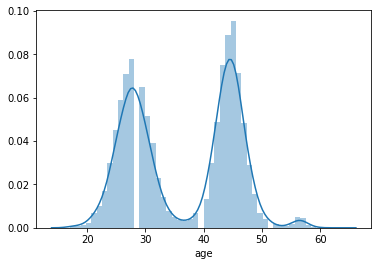

In [19]:
print(df["age"].skew())
sns.distplot(df["age"].dropna())

0.4954590385453248


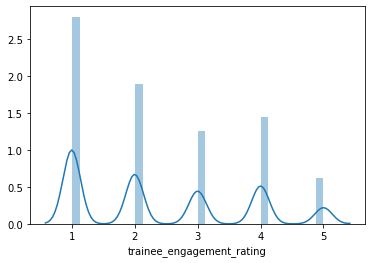

In [20]:
print(df["trainee_engagement_rating"].skew())
sns.distplot(df["trainee_engagement_rating"].dropna())

1.7052777669861743


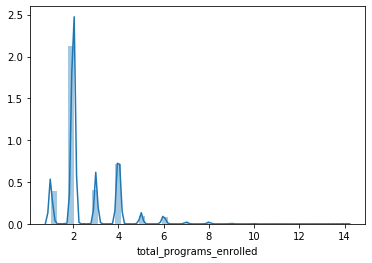

In [21]:
print(df["total_programs_enrolled"].skew())
sns.distplot(df["total_programs_enrolled"].dropna())

0.08177086160094409


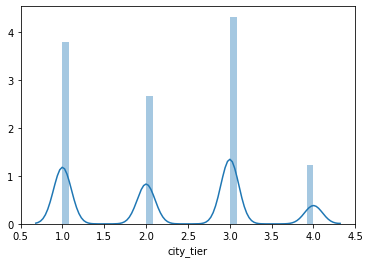

In [22]:
print(df["city_tier"].skew())
sns.distplot(df["city_tier"].dropna())

In [23]:
# 是否有重复值。
print(df["id"].duplicated().sum())

0


## 数据清洗

In [24]:
# 提取新的一列"program_level"
df["program_level"]=df["program_id"].apply(lambda x:str(x)[2])

In [25]:
df["test_id"]=df["test_id"].astype(int)
df["city_tier"]=df["city_tier"].astype(int)
df["program_level"]=df["program_level"].astype(int)

In [26]:
def value_to_level(age):
    if age <20 :
        return "10s"
    elif age >= 20 and age <30:
        return "20s"
    elif age >= 30 and age <40:
        return "30s"
    elif age >= 40 and age <50:
        return "40s"
    elif age >= 50 and age <60:
        return "50s"
    elif age >= 60:
        return "60s"
    else:
        pass

df["age"]= df["age"].apply(value_to_level)
df["age"]=df["age"].fillna("unknown")

In [27]:
df["trainee_engagement_rating"]=df["trainee_engagement_rating"].fillna(0.0)
df["trainee_engagement_rating"]=df["trainee_engagement_rating"].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 17 columns):
id                           104496 non-null object
program_id                   104496 non-null object
program_type                 104496 non-null object
program_duration             104496 non-null int64
test_id                      104496 non-null int32
test_type                    104496 non-null object
difficulty_level             104496 non-null object
trainee_id                   104496 non-null int64
gender                       104496 non-null object
education                    104496 non-null object
city_tier                    104496 non-null int32
age                          104496 non-null object
total_programs_enrolled      104496 non-null int64
is_handicapped               104496 non-null object
trainee_engagement_rating    104496 non-null int32
is_pass                      73147 non-null float64
program_level                104496 non-null int32
dtypes: floa

In [29]:
df.sample()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level
3173,18018_96,V_1,V,133,96,offline,easy,18018,M,Masters,3,40s,2,N,1,0.0,1


In [30]:
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['program_duration', 'total_programs_enrolled']
df[numerical] = scaler.fit_transform(df[numerical])

# 显示一个经过缩放的样例记录
display(df.head(5))

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level
0,9389_150,Y_1,Y,1.000000,150,offline,intermediate,9389,M,Matriculation,3,20s,0.307692,N,1,0.0,1
1,16523_44,T_1,T,0.736842,44,offline,easy,16523,F,High School Diploma,4,20s,0.076923,N,3,1.0,1
2,13987_178,Z_2,Z,0.157895,178,online,easy,13987,M,Matriculation,1,40s,0.000000,N,2,1.0,2
3,13158_32,T_2,T,0.000000,32,offline,easy,13158,F,Matriculation,3,unknown,0.230769,N,1,1.0,2
4,10591_84,V_3,V,0.736842,84,offline,intermediate,10591,F,High School Diploma,1,40s,0.076923,N,4,1.0,3


In [31]:
# object_features = [ 'program_id','program_type', 
#         'test_type', 'difficulty_level', 'gender', 'education', 
#       'age',  'is_handicapped']
# pd.get_dummies(df,object_features)
# pd.get_dummies(df,object_features)
# all_features = pd.get_dummies(all_features).reset_index(drop=True)

In [32]:
def str2int(df,column):
    unique_values = df[column].sort_values().unique()
    value_dict = {}
    for index,value in enumerate(unique_values,start = 1):
        value_dict[value] = index
    return df[column].apply(lambda s : value_dict.get(s))

object_features = ['program_id', 'program_type', 
       'test_type', 'difficulty_level', 'gender', 'education', 
       'age',  'is_handicapped']
for f in object_features:
    df[f] = str2int(df,f)


## 特征提取

In [33]:
df.sample()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level
54143,13514_64,7,3,0.894737,64,2,1,13514,2,2,2,7,0.0,1,4,1.0,1


In [34]:

trainee_pass=dict(df.groupby("trainee_id")["is_pass"].mean())
df["trainee_pass"]=df.trainee_id.map(trainee_pass)


program_pass=dict(df.groupby("program_id")["is_pass"].mean())
df["program_pass"]=df.program_id.map(program_pass)


test_pass=dict(df.groupby("test_id")["is_pass"].mean())
df["test_pass"]=df.test_id.map(test_pass)

In [35]:
edu_dict={1:4,2:2,3:5,4:3,5:1}
df["education"]=df.education.map(edu_dict)

In [36]:
difficul_dict={1:1,2:3,3:2,4:4}
df["difficulty_level"]=df.difficulty_level.map(difficul_dict)

In [37]:
df.sample(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level,trainee_pass,program_pass,test_pass
37280,19796_68,12,4,0.263158,68,1,2,19796,2,2,3,4,0.230769,1,4,1.0,4,0.857143,0.575448,0.713092
96529,4438_49,8,3,0.263158,49,1,2,4438,2,2,1,3,0.153846,1,1,NaN,2,0.636364,0.597462,0.667820
35722,7346_50,8,3,0.263158,50,1,2,7346,1,2,2,7,0.076923,1,4,0.0,2,0.900000,0.597462,0.595588
76802,15101_44,3,2,0.736842,44,1,1,15101,1,3,3,2,0.076923,1,1,NaN,1,NaN,0.505393,0.463636
90879,11430_51,8,3,0.263158,51,1,2,11430,1,3,1,2,0.153846,1,3,NaN,2,0.714286,0.597462,0.542735
83635,4686_66,12,4,0.263158,66,1,1,4686,1,2,1,7,0.076923,1,2,NaN,4,0.666667,0.575448,0.629820
88033,18854_122,19,6,0.210526,122,2,1,18854,2,2,1,2,0.307692,1,4,NaN,4,0.833333,0.776203,0.768617
39011,13281_153,16,6,1.000000,153,1,3,13281,2,2,3,2,0.230769,1,4,1.0,1,1.000000,0.787049,0.744493
16065,10672_161,22,7,0.684211,161,1,1,10672,1,3,3,7,0.000000,1,1,1.0,3,1.000000,0.734111,0.526786
38050,18288_100,9,4,0.842105,100,1,4,18288,2,2,3,4,0.076923,2,2,0.0,1,0.857143,0.612790,0.352357


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 20 columns):
id                           104496 non-null object
program_id                   104496 non-null int64
program_type                 104496 non-null int64
program_duration             104496 non-null float64
test_id                      104496 non-null int32
test_type                    104496 non-null int64
difficulty_level             104496 non-null int64
trainee_id                   104496 non-null int64
gender                       104496 non-null int64
education                    104496 non-null int64
city_tier                    104496 non-null int32
age                          104496 non-null int64
total_programs_enrolled      104496 non-null float64
is_handicapped               104496 non-null int64
trainee_engagement_rating    104496 non-null int32
is_pass                      73147 non-null float64
program_level                104496 non-null int32
trainee_pass    

In [39]:
df.describe()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level,trainee_pass,program_pass,test_pass
count,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,73147.000000,104496.000000,103149.000000,104496.000000,104496.000000
mean,11.811170,4.263503,0.589968,90.937672,1.404226,1.650781,9846.168045,1.534690,2.690333,2.248478,4.615248,0.122017,1.088511,2.395297,0.695408,2.361516,0.698651,0.695180,0.695084
std,5.991629,1.817054,0.362779,51.219793,0.490744,0.825037,5706.697072,0.498798,0.767270,1.011789,2.006397,0.095263,0.284037,1.328680,0.460238,1.101691,0.326690,0.086274,0.138772
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.505393,0.201681
25%,6.000000,2.000000,0.210526,45.000000,1.000000,1.000000,5041.000000,1.000000,2.000000,1.000000,3.000000,0.076923,1.000000,1.000000,0.000000,1.000000,0.500000,0.612790,0.602076
50%,12.000000,4.000000,0.736842,90.000000,1.000000,1.000000,9648.500000,2.000000,3.000000,2.000000,4.000000,0.076923,1.000000,2.000000,1.000000,2.000000,0.800000,0.734315,0.697674
75%,17.000000,6.000000,0.894737,135.000000,2.000000,2.000000,14555.250000,2.000000,3.000000,3.000000,7.000000,0.153846,1.000000,4.000000,1.000000,3.000000,1.000000,0.747937,0.801047
max,22.000000,7.000000,1.000000,187.000000,2.000000,4.000000,20098.000000,2.000000,5.000000,4.000000,7.000000,1.000000,2.000000,5.000000,1.000000,4.000000,1.000000,0.839140,0.955752


In [40]:
# df["trainee_pass"]=df["trainee_pass"].fillna(0.8)

## 划分训练集、测试集

In [41]:
df=df.set_index("id")
df_train_,df_test=df.iloc[:73147,:],df.iloc[-31349:,:]
df_train=df_train_.drop(columns=["is_pass"])
df_test=df_test.drop(columns=["is_pass"])
df_lable=df_train_["is_pass"]

In [42]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73147 entries, 9389_150 to 4467_119
Data columns (total 18 columns):
program_id                   73147 non-null int64
program_type                 73147 non-null int64
program_duration             73147 non-null float64
test_id                      73147 non-null int32
test_type                    73147 non-null int64
difficulty_level             73147 non-null int64
trainee_id                   73147 non-null int64
gender                       73147 non-null int64
education                    73147 non-null int64
city_tier                    73147 non-null int32
age                          73147 non-null int64
total_programs_enrolled      73147 non-null float64
is_handicapped               73147 non-null int64
trainee_engagement_rating    73147 non-null int32
program_level                73147 non-null int32
trainee_pass                 73147 non-null float64
program_pass                 73147 non-null float64
test_pass                   

## KNN填充trainee_pass空值

In [43]:
knn_test=df_test[df_test.isnull().T.any()].drop(columns=["trainee_pass"])

In [44]:
knn_test

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,program_level,program_pass,test_pass
id,,,,,,,,,,,,,,,,,
10150_125,18,6,0.947368,125,1,2,10150,1,2,1,3,0.230769,1,2,3,0.742111,0.802969
17292_94,9,4,0.842105,94,1,1,17292,2,2,2,3,0.076923,1,1,1,0.612790,0.632124
9725_125,18,6,0.947368,125,1,2,9725,1,3,3,7,0.153846,1,4,3,0.742111,0.802969
3906_95,9,4,0.842105,95,1,1,3906,2,4,1,3,0.076923,1,1,1,0.612790,0.801047
10021_101,15,5,1.000000,101,1,2,10021,2,3,3,3,0.230769,1,1,3,0.801660,0.839674
7852_82,11,4,0.736842,82,1,2,7852,2,2,1,7,0.230769,1,1,3,0.578239,0.765714
3462_104,15,5,1.000000,104,1,3,3462,2,2,4,2,0.076923,1,3,3,0.801660,0.741176
6051_74,12,4,0.263158,74,2,1,6051,2,2,1,2,0.153846,1,1,4,0.575448,0.752000
15310_43,3,2,0.736842,43,1,1,15310,1,3,4,3,0.076923,1,1,1,0.505393,0.584106


In [45]:
knn_train=df_train
knn_label=knn_train["trainee_pass"]
knn_train=knn_train.drop(columns=["trainee_pass"])
knn_test=df_test[df_test.isnull().T.any()].drop(columns=["trainee_pass"])

from sklearn.neighbors import KNeighborsRegressor
 
clf = KNeighborsRegressor(n_neighbors = 5, weights = "distance")
clf.fit(knn_train, knn_label)
trainee_pass_null=clf.predict(knn_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [46]:
null_index=df_test[df_test.isnull().T.any()].index

In [47]:
df_test.loc[null_index]["trainee_pass"]=trainee_pass_null

## 数据再探索

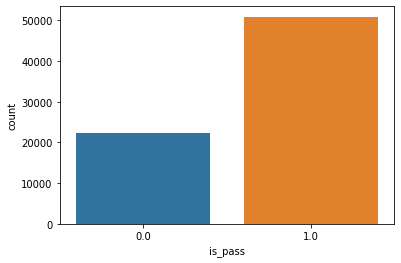

In [48]:
sns.countplot(x="is_pass", data=df_train_);

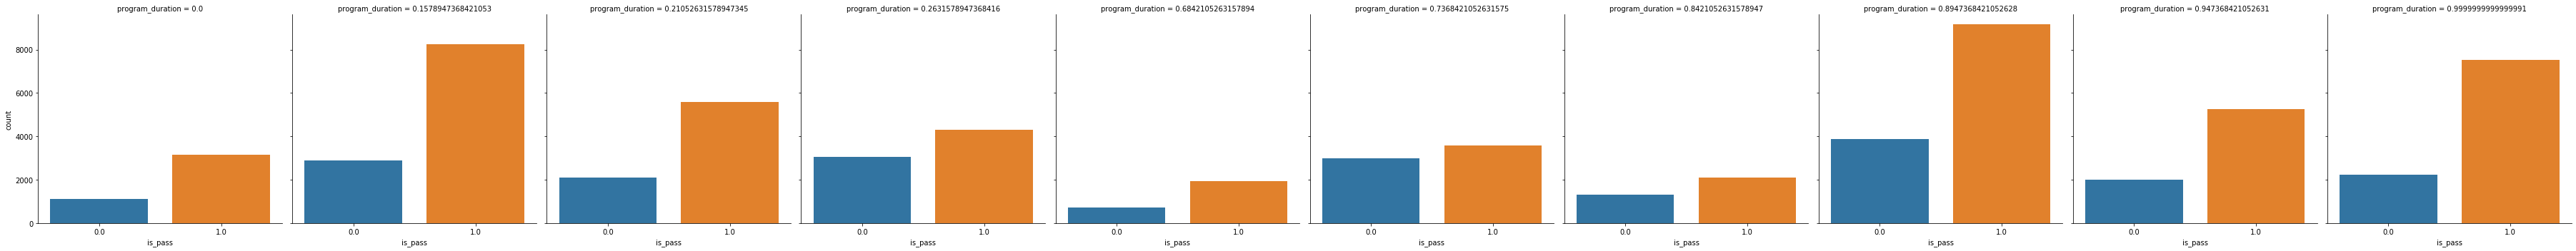

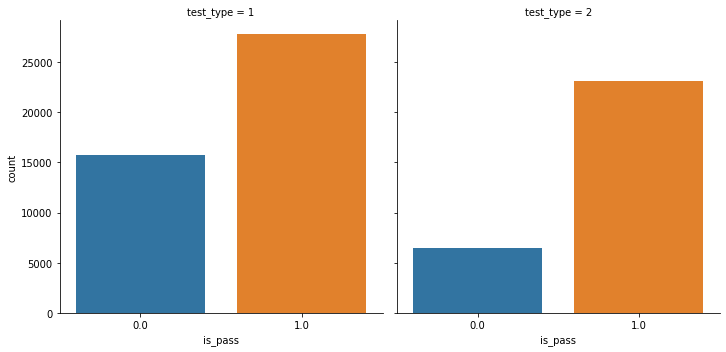

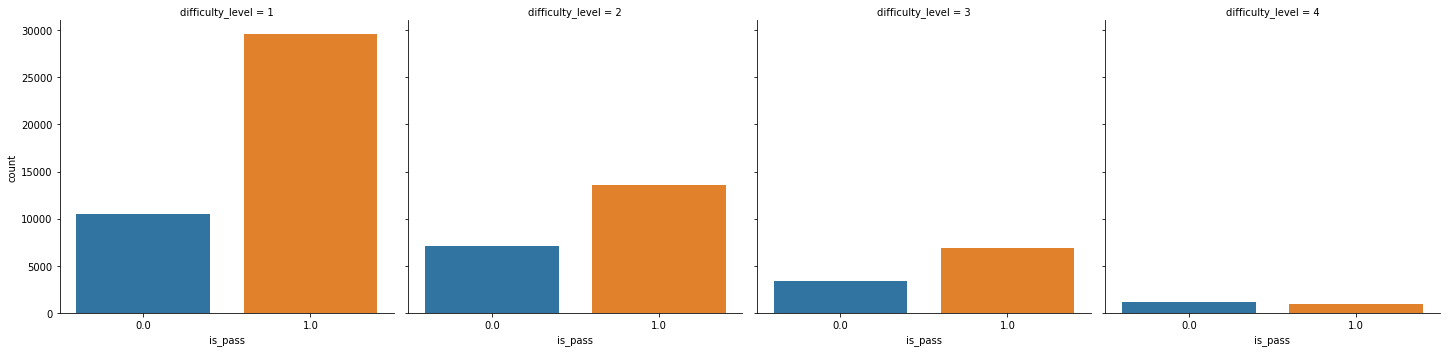

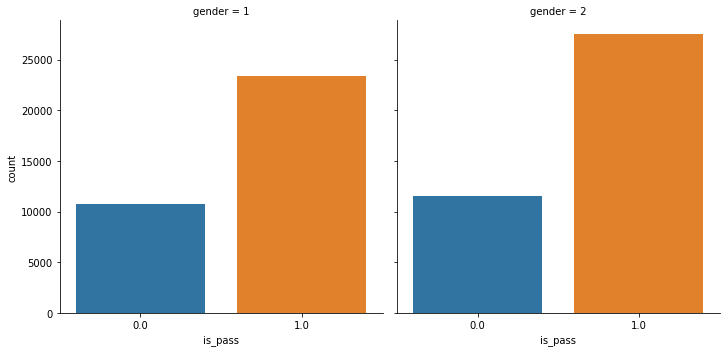

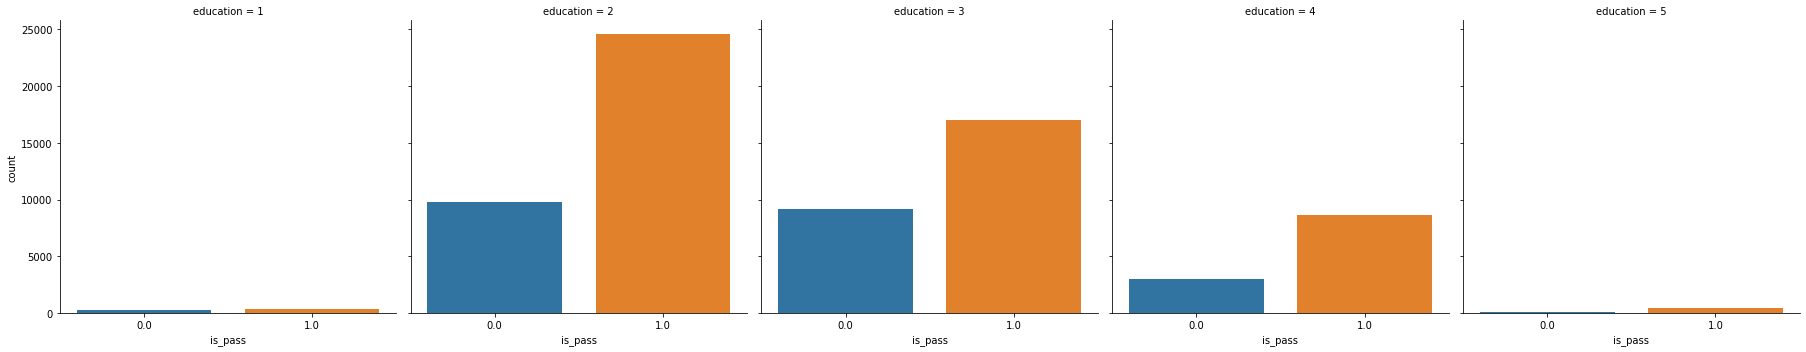

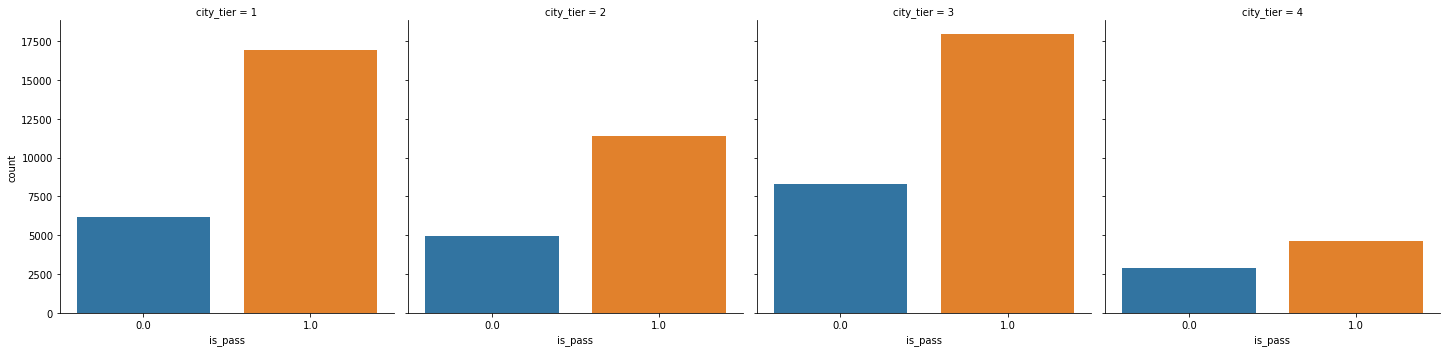

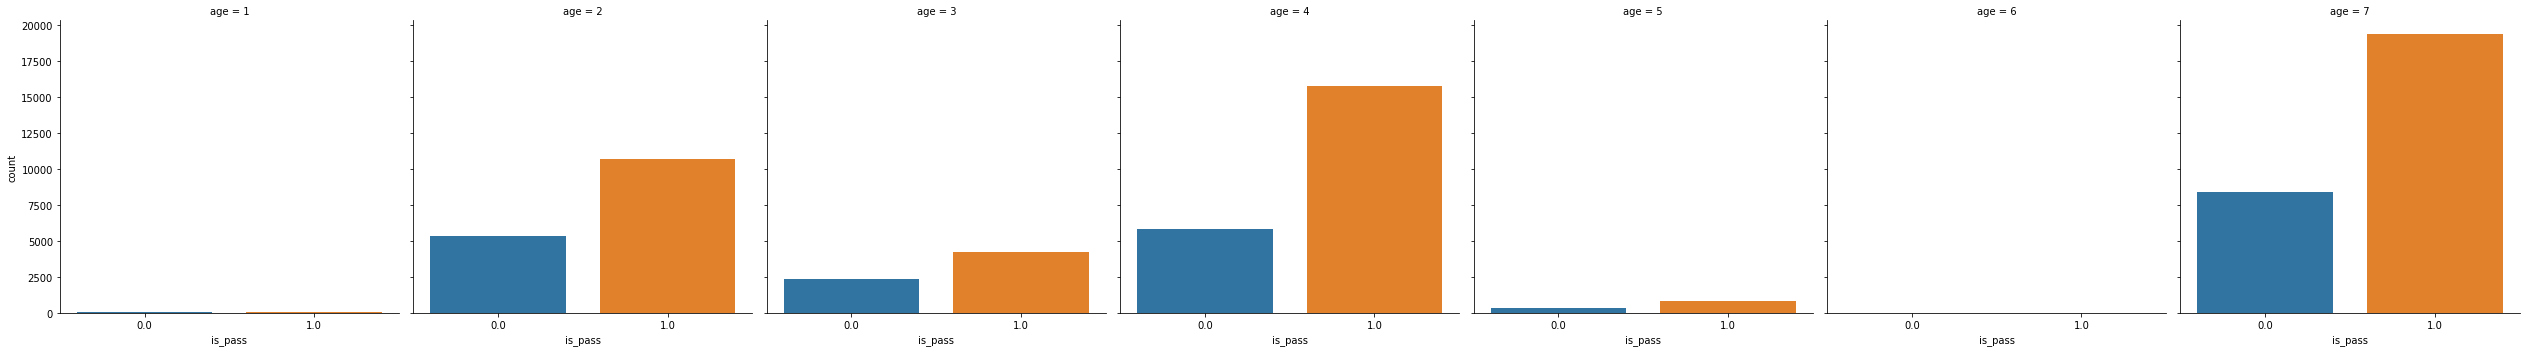

Error in callback <function flush_figures at 0x000002796A212BF8> (for post_execute):


KeyboardInterrupt: 

In [49]:
columns=[ 'program_duration',
       'test_type', 'difficulty_level','gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'program_level']
for column in columns:
    display(sns.factorplot(x='is_pass', col=column, kind='count', data=df_train_));

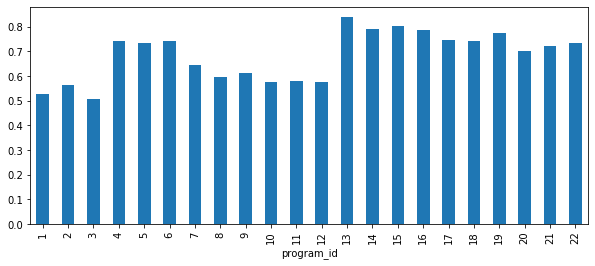

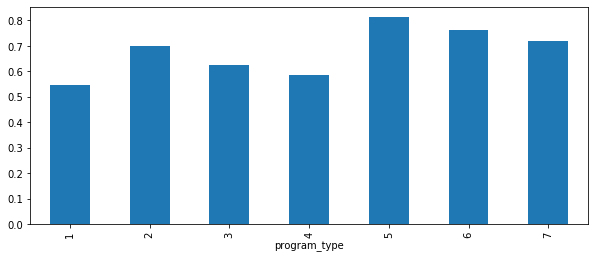

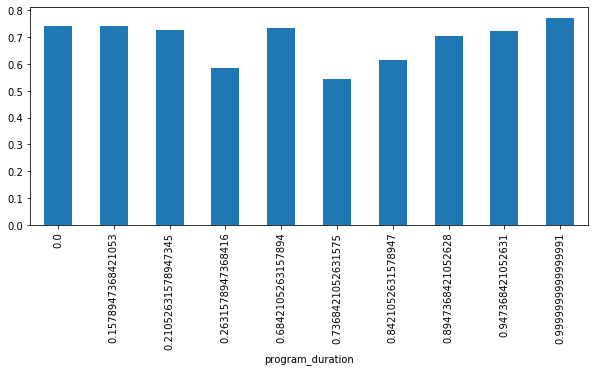

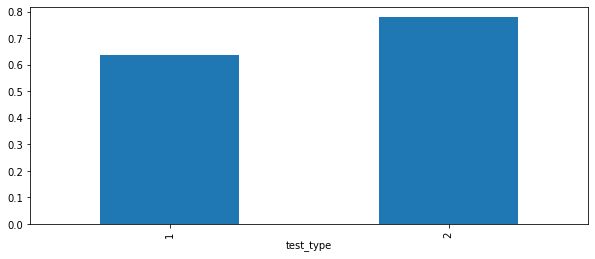

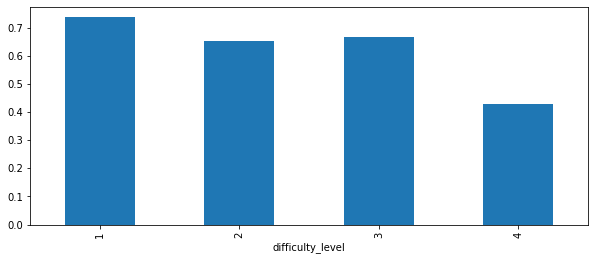

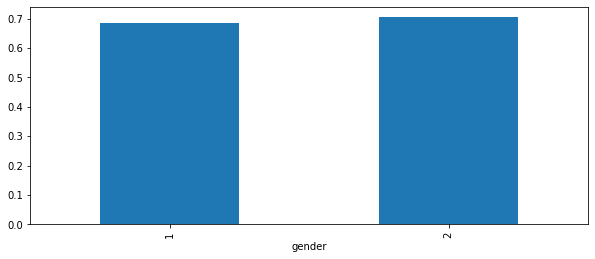

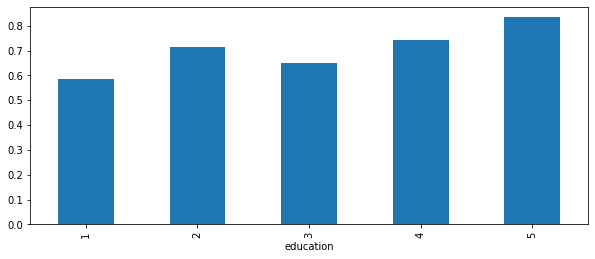

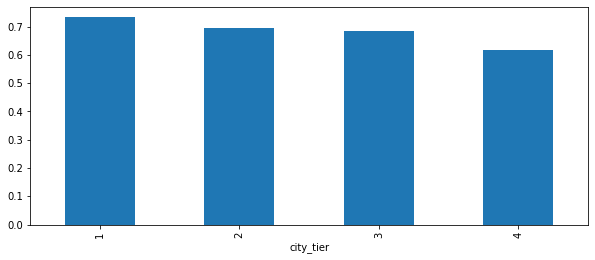

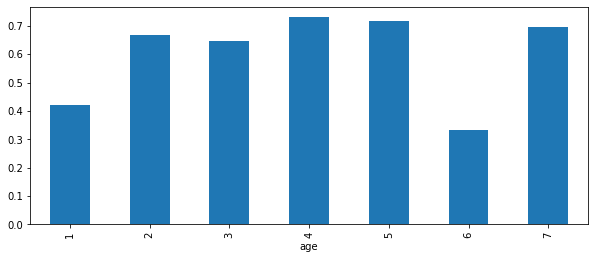

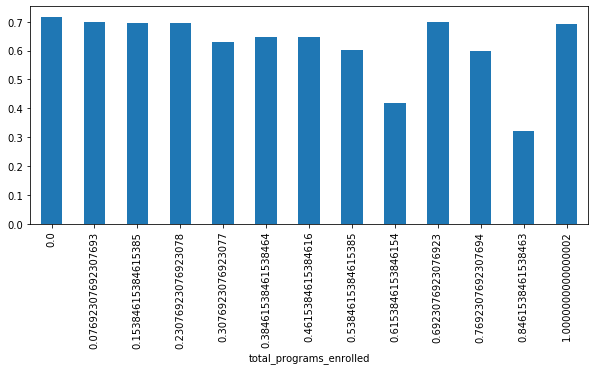

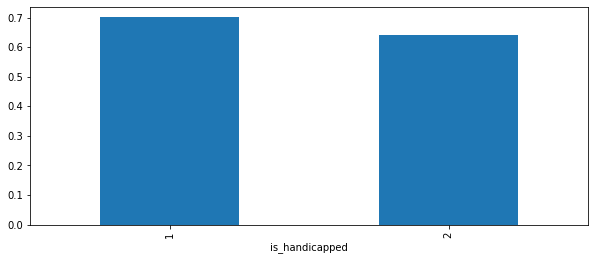

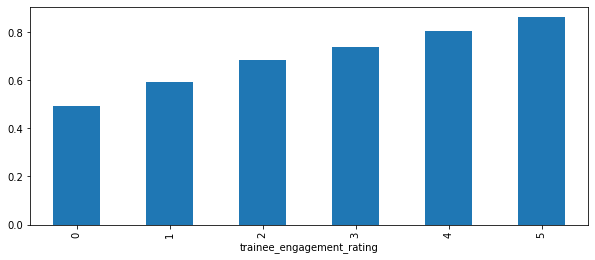

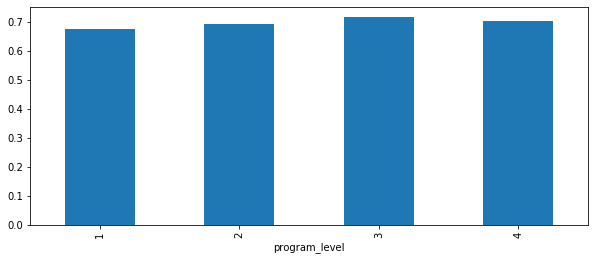

In [50]:
columns=[ 'program_id','program_type','program_duration',
       'test_type', 'difficulty_level','gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'program_level']
for column in columns:
    display(df_train_.groupby(column).mean()["is_pass"].plot(kind="bar", figsize=(10,4), fontsize=10));
    plt.show()

<Figure size 800x640 with 0 Axes>

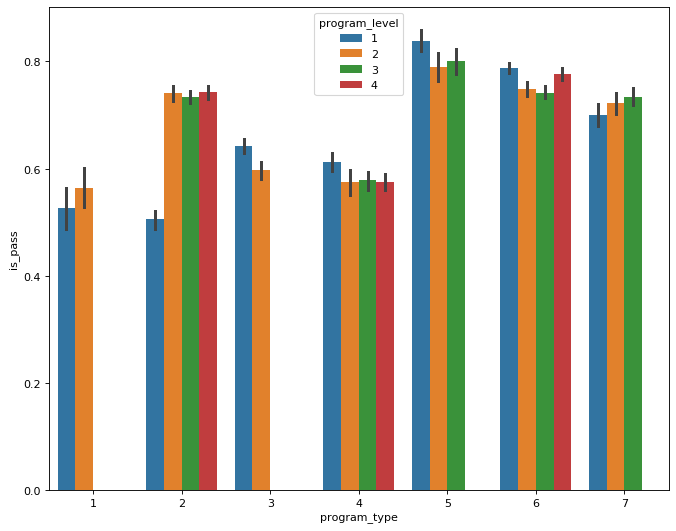

In [51]:
plt.figure(figsize=(10,8), dpi= 80)
sns.barplot(x=df_train_["program_type"],y=df_train_["is_pass"],hue=df_train_["program_level"],data=df_train_)

**大致比较上图，可以了解到测验通过率：  
'program_id'通过率分布在'program_type'组内主要受program_level影响大；  
'program_type'各组表现不同；  
'test_type'的分类线上比线下高；  
'difficulty_level'是难度越高通过率越低；  
'gender'分类下通过率没有太大区别；  
'education'基本学历越高通过率越高；'city_tier'数值越大，通过率越低；  
'age’分三个组，40-60最高，然后20，最低的是20岁以下的；  
'total_programs_enrolled'整体是越多的话，就通过率越低；  
'is_handicapped'残疾的通过率稍微低一点；  
'trainee_engagement_rating'评分越高通过率越高;
'program_level'各programme type组内表现不一。**

In [52]:
# ['id', 'program_id', 'program_type', 'program_duration', 'test_id',
#        'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
#        'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
#        'trainee_engagement_rating', 'is_pass', 'program_level'],
#       dtype='object'

<Figure size 1080x720 with 0 Axes>

(19.5, -0.5)

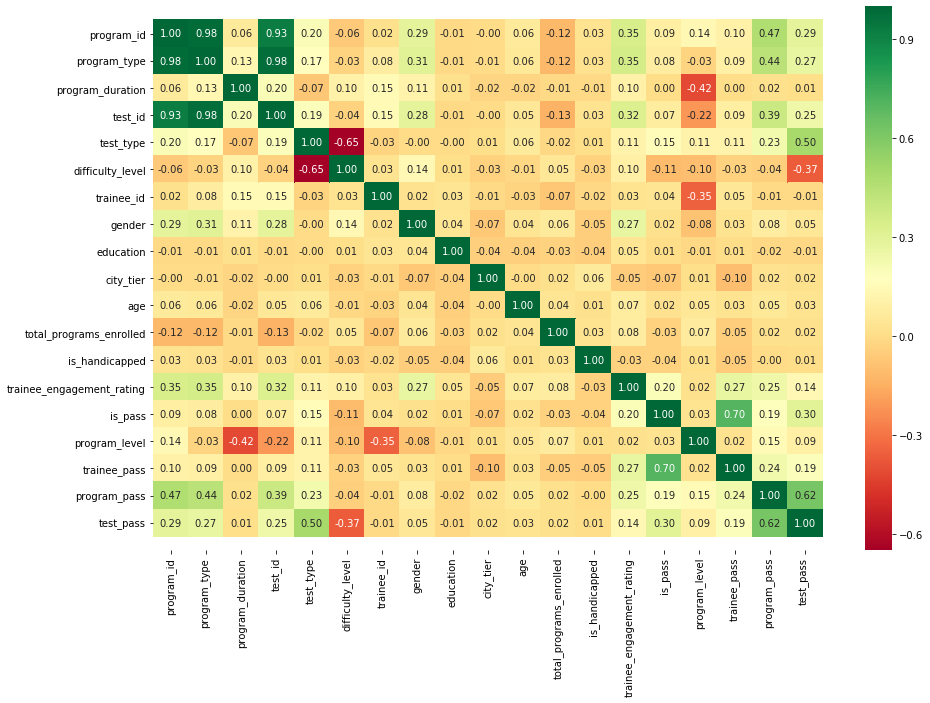

In [53]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_train_.corr(), cmap=plt.cm.RdYlGn, annot=True, fmt=".2f")
# 注意：Matplotlib 3.1.1版本的bug，heatmap的首行与末行会显示不全。
# 可手动调整y轴的范围来进行修复。（老版本的Matplotlib不需要调整y轴范围。）
a, b = ax.get_ylim()
ax.set_ylim(a + 0.5, b - 0.5)

## 数据离散程度、数据标准差

## 特征选取（降维）

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73147 entries, 9389_150 to 4467_119
Data columns (total 18 columns):
program_id                   73147 non-null int64
program_type                 73147 non-null int64
program_duration             73147 non-null float64
test_id                      73147 non-null int32
test_type                    73147 non-null int64
difficulty_level             73147 non-null int64
trainee_id                   73147 non-null int64
gender                       73147 non-null int64
education                    73147 non-null int64
city_tier                    73147 non-null int32
age                          73147 non-null int64
total_programs_enrolled      73147 non-null float64
is_handicapped               73147 non-null int64
trainee_engagement_rating    73147 non-null int32
program_level                73147 non-null int32
trainee_pass                 73147 non-null float64
program_pass                 73147 non-null float64
test_pass                   

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31349 entries, 1626_45 to 9004_107
Data columns (total 18 columns):
program_id                   31349 non-null int64
program_type                 31349 non-null int64
program_duration             31349 non-null float64
test_id                      31349 non-null int32
test_type                    31349 non-null int64
difficulty_level             31349 non-null int64
trainee_id                   31349 non-null int64
gender                       31349 non-null int64
education                    31349 non-null int64
city_tier                    31349 non-null int32
age                          31349 non-null int64
total_programs_enrolled      31349 non-null float64
is_handicapped               31349 non-null int64
trainee_engagement_rating    31349 non-null int32
program_level                31349 non-null int32
trainee_pass                 30002 non-null float64
program_pass                 31349 non-null float64
test_pass                    

In [56]:
# from fancyimpute import KNN
 
# df_test = pd.DataFrame(KNN(k=6).fit_transform(df_test), columns="trainee_pass")

In [57]:
from sklearn.ensemble import RandomForestClassifier

names = df.columns

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(df_train, df_lable)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Features sorted by their score:
[(0.5006, 'program_level'), (0.1034, 'trainee_id'), (0.098, 'program_pass'), (0.0492, 'test_id'), (0.038, 'trainee_engagement_rating'), (0.0341, 'city_tier'), (0.0322, 'age'), (0.0288, 'total_programs_enrolled'), (0.0265, 'education'), (0.0186, 'trainee_pass'), (0.0137, 'difficulty_level'), (0.0127, 'gender'), (0.01, 'test_type'), (0.0093, 'program_id'), (0.0086, 'is_handicapped'), (0.0066, 'program_duration'), (0.0051, 'is_pass'), (0.0045, 'program_type')]


<BarContainer object of 18 artists>

([<matplotlib.axis.YTick at 0x2797488a1d0>,
 <a list of 18 Text yticklabel objects>)

Text(0.5, 0, 'Relative Importance')

Text(0.5, 1.0, 'Variable Importance')

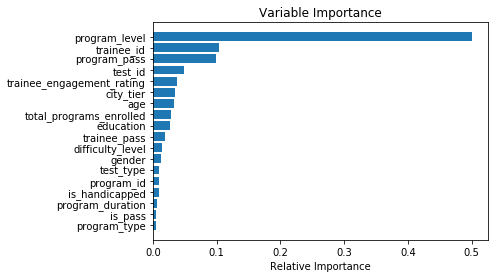

In [58]:
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

# 模型选取

In [59]:
# df_train_sub=df_train.drop(columns=["program_id","program_duration","program_type"])
# df_test_sub=df_test.drop(columns=["program_id","program_duration","program_type"])

In [65]:
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import sklearn.model_selection as ms
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [66]:
gbm = lgb.LGBMClassifier(objective = 'binary',
                         is_unbalance = True,
                         metric = 'binary_logloss,auc',
                         max_depth = 6,
                         num_leaves = 40,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
score = ms.cross_val_score(gbm, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.94307623 0.94255704 0.9438336  0.94250277 0.94416174]
accuracy mean= 0.9432262748444031


In [67]:
xgb=XGBClassifier(max_depth=10,subsample=0.7,colsample_bytree=0.75,reg_lambda=0.1,n_estimators=300)
score = ms.cross_val_score(xgb, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.91113407 0.90974644 0.91216232 0.91204345 0.91135653]
accuracy mean= 0.9112885640203128


In [68]:
sgd= linear_model.SGDClassifier()
score = ms.cross_val_score(sgd, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.54613425 0.54139816 0.56633887 0.55593129 0.55087708]
accuracy mean= 0.5521359297244433


In [69]:
random_forest = RandomForestClassifier(n_estimators=100)
score = ms.cross_val_score(random_forest, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.92893856 0.92862271 0.93163478 0.9290169  0.92954587]
accuracy mean= 0.9295517626171286


In [70]:
logreg = LogisticRegression()
score = ms.cross_val_score(logreg, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.80230696 0.7856907  0.87315342 0.78581798 0.84010276]
accuracy mean= 0.8174143638326496


In [71]:
knn = KNeighborsClassifier(n_neighbors = 3)
score = ms.cross_val_score(knn, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.70471531 0.71254761 0.71301153 0.7118964  0.70661756]
accuracy mean= 0.7097576830016219


In [72]:
gaussian = GaussianNB()
score = ms.cross_val_score(gaussian, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.88581183 0.88022912 0.88712425 0.87994449 0.88369533]
accuracy mean= 0.8833610033032022


In [73]:
perceptron = Perceptron()
score = ms.cross_val_score(perceptron, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.52835335 0.52326611 0.48588164 0.52871475 0.52921895]
accuracy mean= 0.519086958912801


In [74]:
linear_svc = LinearSVC()
score = ms.cross_val_score(linear_svc, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.90814643 0.91475744 0.90886278 0.89773501 0.90691182]
accuracy mean= 0.9072826949269459


In [75]:
decision_tree = DecisionTreeClassifier()
score = ms.cross_val_score(decision_tree, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.78451314 0.79067153 0.78603746 0.78323788 0.78476605]
accuracy mean= 0.7858452121083463


**基于以上表现，选取lgb**

## 挑选模型参数

In [76]:
parameters = {
'min_child_samples':[300,500,800],
'min_child_weight': [0.001,0.002]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.7,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=21,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0.001,
                                      reg_lambda=8, silent=Tr

参数的最佳取值:{'min_child_samples': 800, 'min_child_weight': 0.001}
最佳模型得分:0.9426507182378142
[0.94114211 0.94114211 0.94211692 0.94211692 0.94265072 0.94265072]
[{'min_child_samples': 300, 'min_child_weight': 0.001}, {'min_child_samples': 300, 'min_child_weight': 0.002}, {'min_child_samples': 500, 'min_child_weight': 0.001}, {'min_child_samples': 500, 'min_child_weight': 0.002}, {'min_child_samples': 800, 'min_child_weight': 0.001}, {'min_child_samples': 800, 'min_child_weight': 0.002}]


In [77]:
parameters = {
    'feature_fraction': [0.6, 0.8, 1],
}
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )

gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.7,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0.001,
                                      reg_lambda=8, silent=T

参数的最佳取值:{'feature_fraction': 0.8}
最佳模型得分:0.9427171529405111
[0.9427145  0.94271715 0.94260223]
[{'feature_fraction': 0.6}, {'feature_fraction': 0.8}, {'feature_fraction': 1}]


In [78]:
parameters = {
     'bagging_fraction': [0.8,0.9,1],
     'bagging_freq': [2,3,4],
}
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0.001,
                                      reg_lambda=8, silent=T

参数的最佳取值:{'bagging_fraction': 1, 'bagging_freq': 2}
最佳模型得分:0.9427171529405111
[0.94222743 0.9421783  0.94222895 0.94230544 0.94240192 0.94240506
 0.94271715 0.94271715 0.94271715]
[{'bagging_fraction': 0.8, 'bagging_freq': 2}, {'bagging_fraction': 0.8, 'bagging_freq': 3}, {'bagging_fraction': 0.8, 'bagging_freq': 4}, {'bagging_fraction': 0.9, 'bagging_freq': 2}, {'bagging_fraction': 0.9, 'bagging_freq': 3}, {'bagging_fraction': 0.9, 'bagging_freq': 4}, {'bagging_fraction': 1, 'bagging_freq': 2}, {'bagging_fraction': 1, 'bagging_freq': 3}, {'bagging_fraction': 1, 'bagging_freq': 4}]


In [79]:
parameters = {
     'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100...
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0.001,
                                      reg_lambda=8, silent=True, subsample=1.0,
                                      subsample

参数的最佳取值:{'reg_alpha': 0, 'reg_lambda': 0.03}
最佳模型得分:0.9425089729345385
[0.94239337 0.94227489 0.94226722 0.94250897 0.94238684 0.94230587
 0.94234926 0.9424037  0.94237592 0.94231436 0.94230185 0.94234077
 0.94238079 0.94245626 0.94229291 0.94227294 0.9422472  0.94238297
 0.94240935 0.94235034 0.94230114 0.94231553 0.94228067 0.94236146
 0.94236883 0.94231495 0.94243629 0.94232734 0.94229968 0.94228015
 0.94221738 0.94235318 0.94239019 0.94235542 0.94241488 0.94216651
 0.94218684 0.94222675 0.94238924 0.94234555 0.94235788 0.94229676
 0.94234615 0.9423193  0.94229418 0.94226391 0.94229743 0.94230002
 0.94239294]
[{'reg_alpha': 0, 'reg_lambda': 0}, {'reg_alpha': 0, 'reg_lambda': 0.001}, {'reg_alpha': 0, 'reg_lambda': 0.01}, {'reg_alpha': 0, 'reg_lambda': 0.03}, {'reg_alpha': 0, 'reg_lambda': 0.08}, {'reg_alpha': 0, 'reg_lambda': 0.3}, {'reg_alpha': 0, 'reg_lambda': 0.5}, {'reg_alpha': 0.001, 'reg_lambda': 0}, {'reg_alpha': 0.001, 'reg_lambda': 0.001}, {'reg_alpha': 0.001, 'reg_lambda': 

In [80]:
parameters = {
     'cat_smooth': [0,10,20],
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0,
                         reg_lambda = 0.03,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0,
                                      reg_lambda=0.03, silent=Tr

参数的最佳取值:{'cat_smooth': 0}
最佳模型得分:0.9425089729345385
[0.94250897 0.94250897 0.94250897]
[{'cat_smooth': 0}, {'cat_smooth': 10}, {'cat_smooth': 20}]


In [81]:
parameters = {
     'learning_rate': [0.1,0.01,0.001],
    'num_iterations':[250,300,500,1000]
}
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0,
                         reg_lambda = 0.03,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0,
                                      reg_lambda=0.03, silent=Tr

参数的最佳取值:{'learning_rate': 0.01, 'num_iterations': 1000}
最佳模型得分:0.9436376810312949
[0.94191196 0.94127072 0.9390584  0.93514606 0.94228133 0.94270234
 0.94350932 0.94363768 0.93759952 0.93801353 0.93892682 0.94004625]
[{'learning_rate': 0.1, 'num_iterations': 250}, {'learning_rate': 0.1, 'num_iterations': 300}, {'learning_rate': 0.1, 'num_iterations': 500}, {'learning_rate': 0.1, 'num_iterations': 1000}, {'learning_rate': 0.01, 'num_iterations': 250}, {'learning_rate': 0.01, 'num_iterations': 300}, {'learning_rate': 0.01, 'num_iterations': 500}, {'learning_rate': 0.01, 'num_iterations': 1000}, {'learning_rate': 0.001, 'num_iterations': 250}, {'learning_rate': 0.001, 'num_iterations': 300}, {'learning_rate': 0.001, 'num_iterations': 500}, {'learning_rate': 0.001, 'num_iterations': 1000}]


In [82]:
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.01,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0,
                         reg_lambda = 0.03,
                         cat_smooth = 0,
                         num_iterations = 1000,   
                        )


# 提交训练结果

In [83]:
gbm.fit(df_train,df_lable)
df_test_p=gbm.predict(df_test)

print(df_test_p)

df_pre_gbm=pd.read_csv("./sample_submission_vaSxamm.csv")

df_pre_gbm["is_pass"]=df_test_p

df_pre_gbm.to_csv("sumple_test-gbm.csv",index=False)

LGBMClassifier(bagging_fraction=1, bagging_freq=2, boosting_type='gbdt',
               cat_smooth=0, class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.8, importance_type='split',
               learning_rate=0.01, max_depth=10, metric='binary_logloss,auc',
               min_child_samples=800, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
               num_iterations=1000, num_leaves=100, objective='binary',
               random_state=None, reg_alpha=0, reg_lambda=0.03, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

[0. 1. 0. ... 1. 0. 1.]
